In [16]:
from vapor_pressure import Objective
from datahandling import MyDataFrame

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

from scipy.optimize import fsolve

# Headline
Objective:
- Estimate $T_{bubble}$ **(I)**
  
- Based on $T_{bubble}$ calculate vapor pressure, $P_{vap}$, for each substance (Antoine's Equation) **(II)**
  
- Based on calculations of step **(I)** and **(II)**, we can use Raoult's Law ($\phi = 1$ and $\gamma = 1$) **(III)**
  
- From step **(III)** we can evaluate the vapor phase composition: $y_i = x_i * \frac {P_{vap}(T)}{P_{sys}}$


In [17]:
alkanedata = pd.read_excel('AlkaneAntoineData.xlsx')
alkanedata.head()

,formula,composto,A,B,C,zi,Tc [C],Pc [bar],Omega
0,CH4,metano,15.2243,897.84,-7.16,0.002,-82.59,45.99,0.011
1,C2H6,etano,15.6637,1511.42,-17.16,0.002,32.17,48.72,0.099
2,C3H8,propano,15.7260,1872.46,-25.16,0.002,96.68,42.48,0.152
3,C4H10,n-butano,15.6782,2154.90,-34.42,0.002,151.97,37.96,0.199
4,C4H10,iso-butano,15.5381,2032.73,-33.15,0.002,134.70,36.40,0.186


## Initial Example
Here's some code that'll estimate the *bubble point* temperature based on the composition given and the system pressure. It is very simple and should give us an idea of what to expect from a larger dataset.

In [18]:
# Example DataFrame for Antoine constants
data_example = {
    'Component': ['Acetone', 'Acetonitrile', 'Nitromethane'],
    'A': [14.5463, 14.2724, 14.2043],
    'B': [2940.46, 2945.47, 2972.64],
    'C': [237.22, 224.00, 209.00]
}
df = pd.DataFrame(data_example)

# Create the objective object
obj = Objective(df, x=[0.3, 0.45, 0.25], P=80)

# Solve for the bubble point temperature
ans, = fsolve(obj, 60)

# Print the result
print(obj)

The bubble point temperature is 68.60 degC, and the gas phase compositions are [0.5196 0.3773 0.1031].


## More complex example
Here we have a large dataset with many compounds mainly composed of Alkanes (no insaturation bondings). The purpose is to do the same as seen before but now with more data and new stream composition.
  
- Antoine's Constants presume T [K] and P [mmHg] 
- $P_{system} = 80$ kPa
- Composition available on dataset

In [19]:
# get array of composition
composition = np.array(alkanedata['zi'])
# checking if there's any inconsistency in the composition
print('Sum of composition:', np.sum(composition))

P_sys = 80*7.50062  # in mmHg

Sum of composition: 1.0


In [20]:
# specify columns
columns=['formula', 'composto', 'A','B','C',
         'zi', 'Tc [C]', 'Pc [bar]', 'Omega']

df = MyDataFrame(data=alkanedata, columns=columns)

df.df.head()

,formula,composto,A,B,C,zi,Tc [C],Pc [bar],Omega
0,CH4,metano,15.2243,897.84,-7.16,0.002,-82.59,45.99,0.011
1,C2H6,etano,15.6637,1511.42,-17.16,0.002,32.17,48.72,0.099
2,C3H8,propano,15.7260,1872.46,-25.16,0.002,96.68,42.48,0.152
3,C4H10,n-butano,15.6782,2154.90,-34.42,0.002,151.97,37.96,0.199
4,C4H10,iso-butano,15.5381,2032.73,-33.15,0.002,134.70,36.40,0.186


In [21]:
# solving the bubble point temperature
obj = Objective(df.df, x=composition, P=P_sys)

# Solve for the bubble point temperature
ans, = fsolve(obj, 200)

# Print the result and corresponding label
for index, row in df.df.iterrows():
    print(f"Result: {row['composto']}: {ans} C")

Result: metano: 301.50248904795234 C
Result: etano: 301.50248904795234 C
Result: propano: 301.50248904795234 C
Result: n-butano: 301.50248904795234 C
Result: iso-butano: 301.50248904795234 C
Result: n-pentano: 301.50248904795234 C
Result: 2-metil-butano: 301.50248904795234 C
Result: 2,2-dimetil-propano: 301.50248904795234 C
Result: n-hexano: 301.50248904795234 C
Result: 2-metil-pentano: 301.50248904795234 C
Result: 3-metil-pentano: 301.50248904795234 C
Result: 2,2-dimetil-butano: 301.50248904795234 C
Result: 2,3-dimetil-butano: 301.50248904795234 C
Result: n-heptano: 301.50248904795234 C
Result: 2-metil-hexano: 301.50248904795234 C
Result: 3-metil-hexano: 301.50248904795234 C
Result: 2,2-dimetil-pentano: 301.50248904795234 C
Result: 2,3-dimetil-pentano: 301.50248904795234 C
Result: 2,4-dimetil-pentano: 301.50248904795234 C
Result: 3,3-dimetil-pentano: 301.50248904795234 C
Result: 3-etil-pentano: 301.50248904795234 C
Result: 2,2,3-trimetil-butano: 301.50248904795234 C
Result: n-octano: 

In [22]:
for index, row in alkanedata.iterrows():
    print(f"Substance: {row['composto']}\tFinal composition: {round(obj.x[index],7)}")

Substance: metano	Final composition: 0.002
Substance: etano	Final composition: 0.002
Substance: propano	Final composition: 0.002
Substance: n-butano	Final composition: 0.002
Substance: iso-butano	Final composition: 0.002
Substance: n-pentano	Final composition: 0.02
Substance: 2-metil-butano	Final composition: 0.02
Substance: 2,2-dimetil-propano	Final composition: 0.02
Substance: n-hexano	Final composition: 0.025
Substance: 2-metil-pentano	Final composition: 0.025
Substance: 3-metil-pentano	Final composition: 0.025
Substance: 2,2-dimetil-butano	Final composition: 0.025
Substance: 2,3-dimetil-butano	Final composition: 0.025
Substance: n-heptano	Final composition: 0.03
Substance: 2-metil-hexano	Final composition: 0.03
Substance: 3-metil-hexano	Final composition: 0.03
Substance: 2,2-dimetil-pentano	Final composition: 0.03
Substance: 2,3-dimetil-pentano	Final composition: 0.03
Substance: 2,4-dimetil-pentano	Final composition: 0.03
Substance: 3,3-dimetil-pentano	Final composition: 0.03
Subst

In [23]:
np.sum(obj.x)

1.0

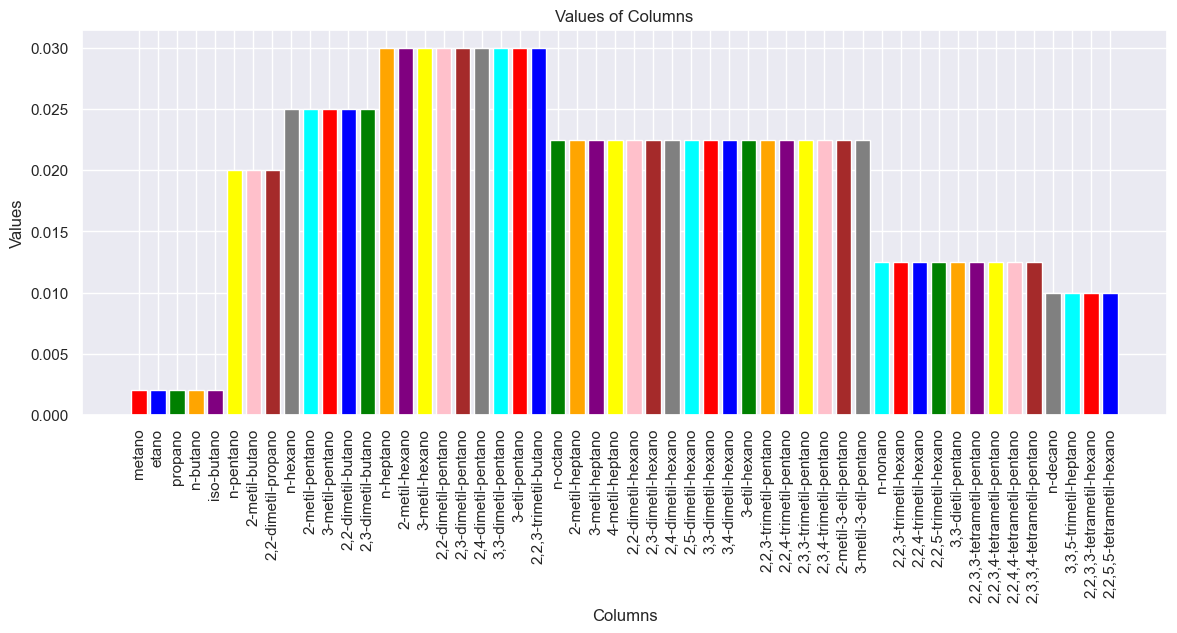

In [24]:
fig = plt.figure(figsize=(14, 5))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan']

plt.bar([labels for labels in df.df['composto']], obj.x, color=colors)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Values of Columns')
plt.xticks(rotation=90)
plt.show()

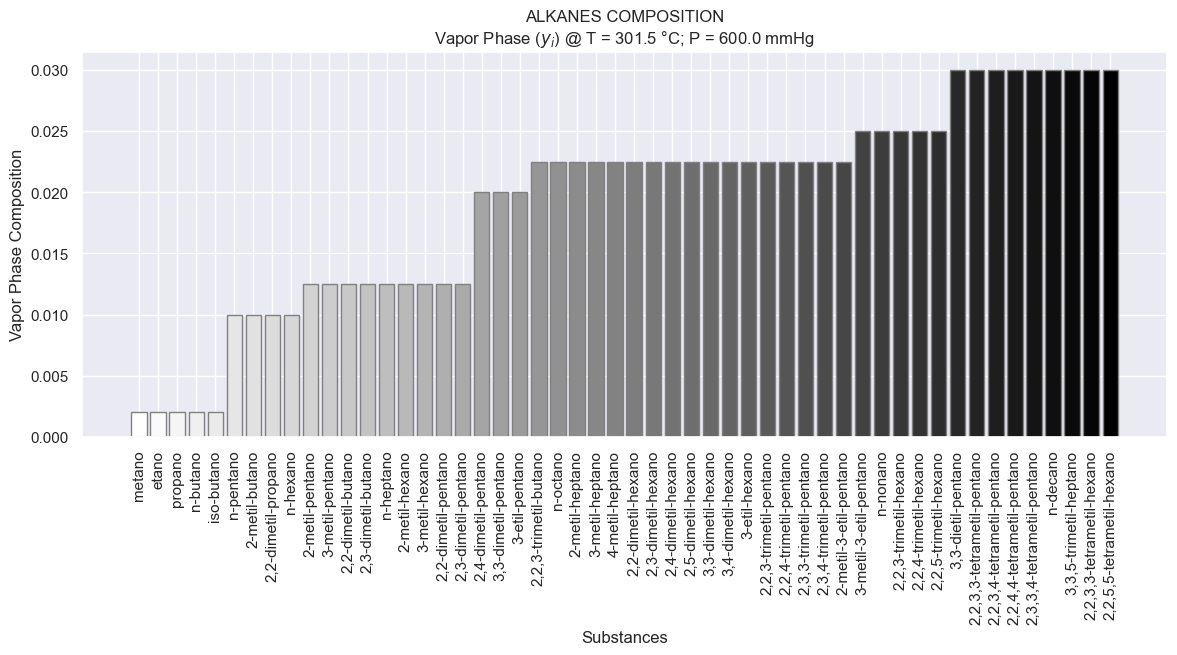

In [26]:
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=(14, 5))

# gray gradient using a colormap
gray_gradient = cm.gray(np.linspace(1, 0, len(df.df)))
ax.bar(df.df['composto'], np.sort(obj.x), color=gray_gradient, edgecolor='gray')
ax.set_xlabel('Substances')
ax.set_ylabel('Vapor Phase Composition')
ax.set_title(f'ALKANES COMPOSITION\nVapor Phase ($y_i$) @ T = {round(ans, 2)} °C; P = {round(P_sys,1)} mmHg')
# Rotate the x-axis labels
plt.xticks(rotation=90)
# Show the plot
plt.show()

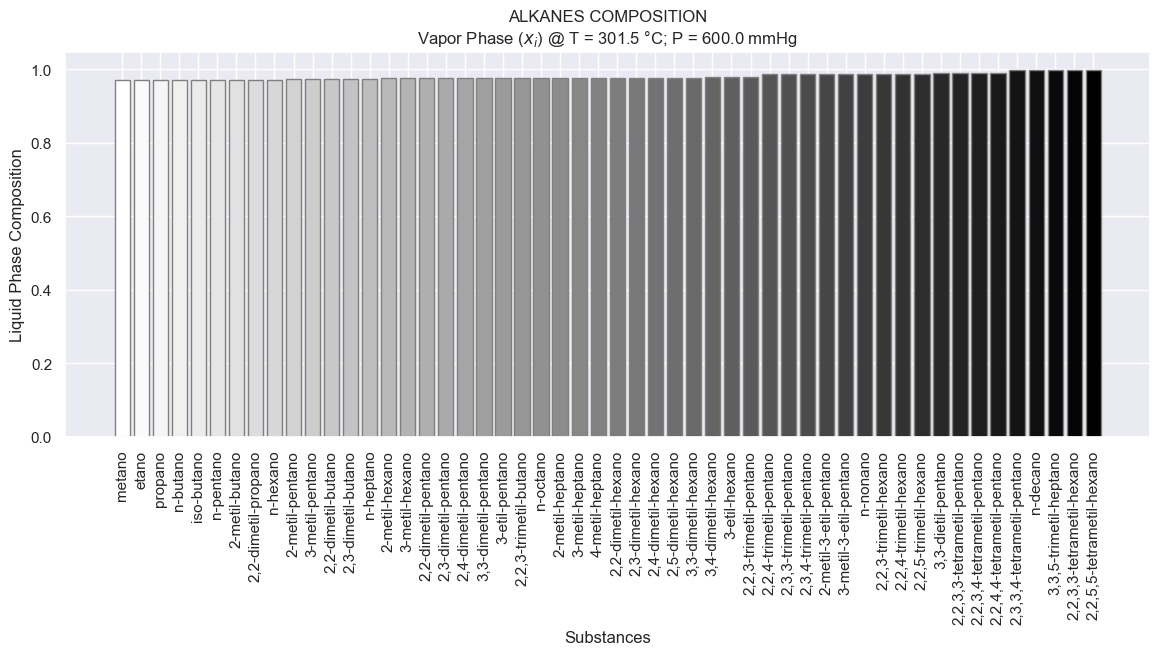

In [57]:
# liquid phase composition
fig, ax = plt.subplots(figsize=(14, 5))
gray_gradient = cm.gray(np.linspace(1, 0, len(df.df)))
liquid_phase = obj.x.ravel()

ax.bar(df.df['composto'], np.sort([1. - i for i in liquid_phase]), color=gray_gradient, edgecolor='gray')
ax.set_xlabel('Substances')
ax.set_ylabel('Liquid Phase Composition')
ax.set_title(f'ALKANES COMPOSITION\nVapor Phase ($x_i$) @ T = {round(ans, 2)} °C; P = {round(P_sys,1)} mmHg')
# Rotate the x-axis labels
plt.xticks(rotation=90)
# Show the plot
plt.show()

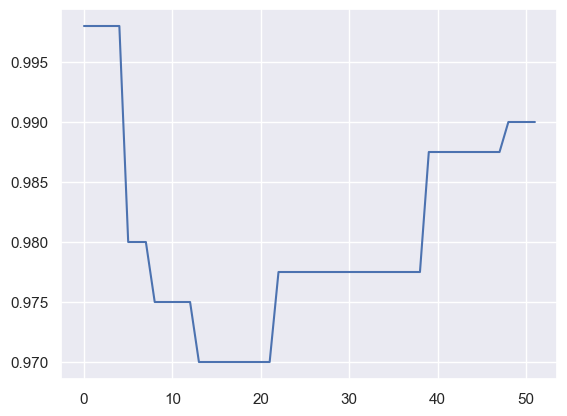

In [56]:
a = obj.x.ravel()
plt.plot([1. - i for i in a])